In [1]:
# IMPORTING LIBRARIES & MAIN PATH

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
dataset = pd.read_csv("AmesHousing.csv")

In [3]:
df = dataset

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
cols = df.select_dtypes('object').columns
df[cols] = df[cols].stack().astype('category').cat.codes.unstack()
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,141.0,141.0,31770,133.0,NaN,88.0,95.0,...,0,NaN,NaN,NaN,0,5,2010,175.0,123.0,215000
1,2,526350040,20,140.0,80.0,11622,133.0,NaN,148.0,95.0,...,0,NaN,109.0,NaN,0,6,2010,175.0,123.0,105000
2,3,526351010,20,141.0,81.0,14267,133.0,NaN,88.0,95.0,...,0,NaN,NaN,71.0,12500,6,2010,175.0,123.0,172000
3,4,526353030,20,141.0,93.0,11160,133.0,NaN,148.0,95.0,...,0,NaN,NaN,NaN,0,4,2010,175.0,123.0,244000
4,5,527105010,60,141.0,74.0,13830,133.0,NaN,88.0,95.0,...,0,NaN,109.0,NaN,0,3,2010,175.0,123.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,141.0,37.0,7937,133.0,NaN,88.0,95.0,...,0,NaN,75.0,NaN,0,3,2006,175.0,123.0,142500
2926,2927,923276100,20,141.0,NaN,8885,133.0,NaN,88.0,94.0,...,0,NaN,109.0,NaN,0,6,2006,175.0,123.0,131000
2927,2928,923400125,85,141.0,62.0,10441,133.0,NaN,148.0,95.0,...,0,NaN,109.0,158.0,700,7,2006,175.0,123.0,132000
2928,2929,924100070,20,141.0,77.0,10010,133.0,NaN,148.0,95.0,...,0,NaN,NaN,NaN,0,4,2006,175.0,123.0,170000


In [6]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [9]:
cc = dict(enumerate(dataset['MS SubClass'].astype('category').cat.categories ) )

In [10]:
s= """1-STORY 1946 & NEWER ALL STYLES
1-STORY 1945 & OLDER
1-STORY W/FINISHED ATTIC ALL AGES
1-1/2 STORY - UNFINISHED ALL AGES
1-1/2 STORY FINISHED ALL AGES
2-STORY 1946 & NEWER
2-STORY 1945 & OLDER
2-1/2 STORY ALL AGES
SPLIT OR MULTI-LEVEL
SPLIT FOYER
DUPLEX - ALL STYLES AND AGES
1-STORY PUD (Planned Unit Development) - 1946 & NEWER
1-1/2 STORY PUD - ALL AGES
2-STORY PUD - 1946 & NEWER
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
2 FAMILY CONVERSION - ALL STYLES AND AGES"""

st = s.split("\n")
zip

zip

In [11]:
cc_codes = dict(zip(cc.keys(), st))
cc_codes

{0: '1-STORY 1946 & NEWER ALL STYLES',
 1: '1-STORY 1945 & OLDER',
 2: '1-STORY W/FINISHED ATTIC ALL AGES',
 3: '1-1/2 STORY - UNFINISHED ALL AGES',
 4: '1-1/2 STORY FINISHED ALL AGES',
 5: '2-STORY 1946 & NEWER',
 6: '2-STORY 1945 & OLDER',
 7: '2-1/2 STORY ALL AGES',
 8: 'SPLIT OR MULTI-LEVEL',
 9: 'SPLIT FOYER',
 10: 'DUPLEX - ALL STYLES AND AGES',
 11: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 12: '1-1/2 STORY PUD - ALL AGES',
 13: '2-STORY PUD - 1946 & NEWER',
 14: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 15: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

In [ ]:
df.columns

In [21]:
impcol=['MS SubClass','MS Zoning','Year Built', 'Lot Area', 'Neighborhood','House Style','Overall Cond','Full Bath','Gr Liv Area','Yr Sold','SalePrice']

In [12]:
df[['MS SubClass','MS Zoning','Year Built', 'Lot Area', 'Neighborhood','House Style','Overall Cond','Full Bath','Gr Liv Area','Yr Sold','SalePrice']].describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
MS SubClass,57.387372,42.638025,20.0,50.0,190.0
MS Zoning,136.161775,20.425412,9.0,141.0,142.0
Year Built,1971.356314,30.245361,1872.0,1973.0,2010.0
Lot Area,10147.921843,7880.017759,1300.0,9436.5,215245.0
Neighborhood,102.713311,43.090990,22.0,113.0,173.0
House Style,14.280205,38.305705,0.0,3.0,152.0
Overall Cond,5.563140,1.111537,1.0,5.0,9.0
Full Bath,1.566553,0.552941,0.0,2.0,4.0
Gr Liv Area,1499.690444,505.508887,334.0,1442.0,5642.0
Yr Sold,2007.790444,1.316613,2006.0,2008.0,2010.0


In [45]:
datasettypes= pd.read_csv("AmesHousing.csv")
datasettypes[impcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2930 non-null   int64 
 1   MS Zoning     2930 non-null   object
 2   Year Built    2930 non-null   int64 
 3   Lot Area      2930 non-null   int64 
 4   Neighborhood  2930 non-null   object
 5   House Style   2930 non-null   object
 6   Overall Cond  2930 non-null   int64 
 7   Full Bath     2930 non-null   int64 
 8   Gr Liv Area   2930 non-null   int64 
 9   Yr Sold       2930 non-null   int64 
 10  SalePrice     2930 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 251.9+ KB


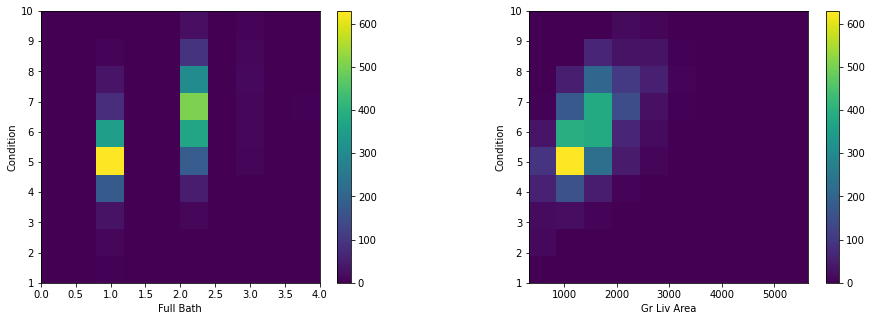

In [83]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Full Bath"], 
                    dataset["Overall Qual"],
                    cmap="viridis");
axes[0].set(xlabel="Full Bath", ylabel="Condition")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["Overall Qual"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="Condition")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

In [73]:
dfcol1 = df[df[impcol[5]]<71][[impcol[5]]]
dfcol1

,House Style
0,3.0
1,3.0
2,3.0
3,3.0
4,6.0
...,...
2923,3.0
2924,3.0
2926,3.0
2928,3.0


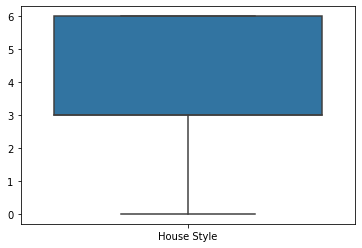

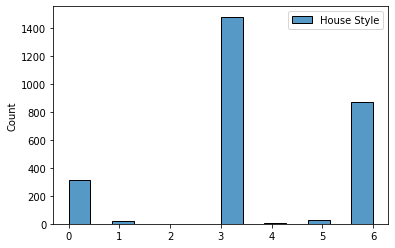

In [74]:

sns.boxplot(data = dfcol1)
plt.show()
sns.histplot(data = dfcol1)
plt.show()
print()

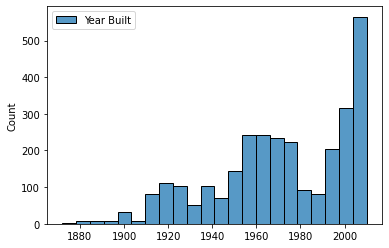

In [216]:
sns.histplot(data = df[["Year Built"]])
plt.show()

In [ ]:
plt.scatter

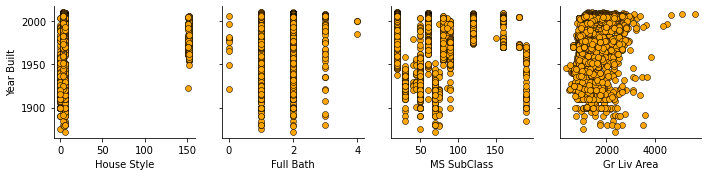

In [213]:
#x_vars = ["House Style", "Full Bath", "MS SubClass","Gr Liv Area"]
g = sns.PairGrid(dataset, y_vars=["Year Built"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5)

Data:  MS SubClass


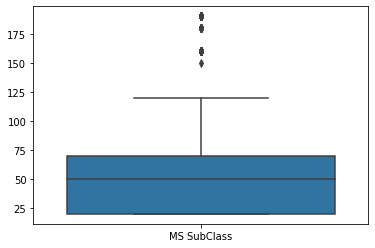

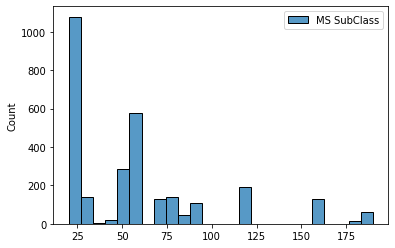


Data:  MS Zoning


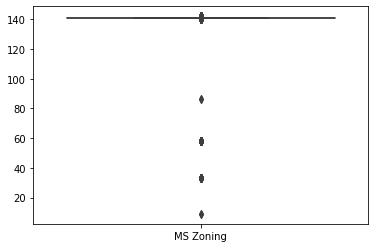

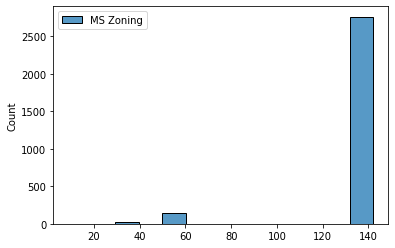


Data:  Year Built


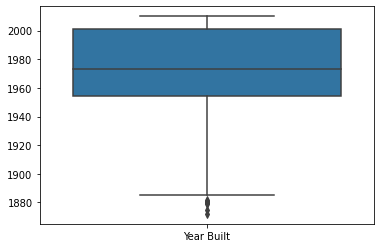

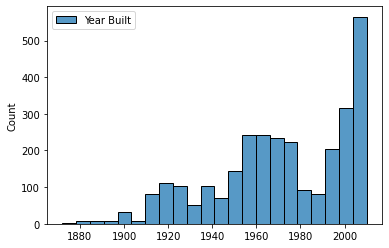


Data:  Lot Area


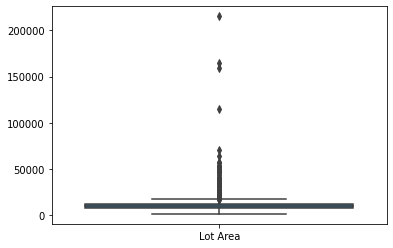

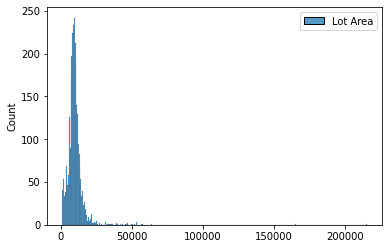


Data:  Neighborhood


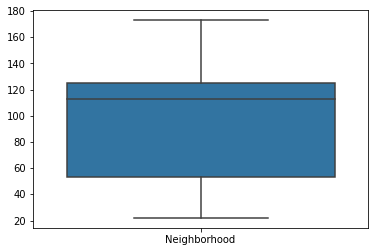

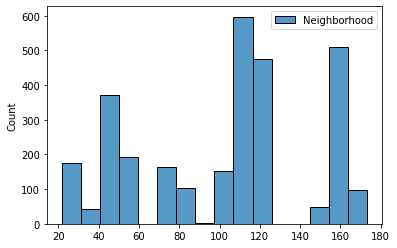


Data:  House Style


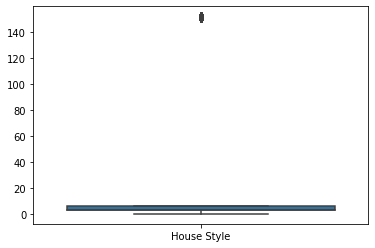

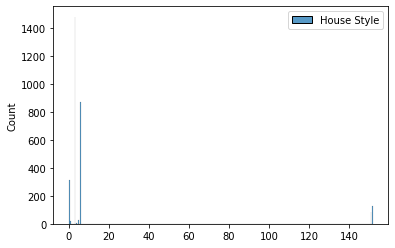


Data:  Overall Cond


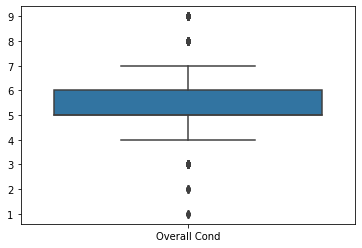

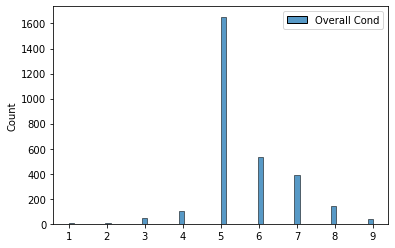


Data:  Full Bath


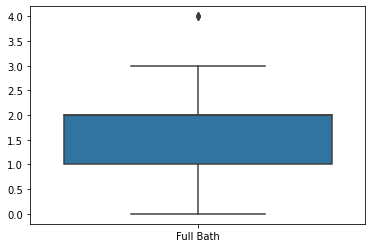

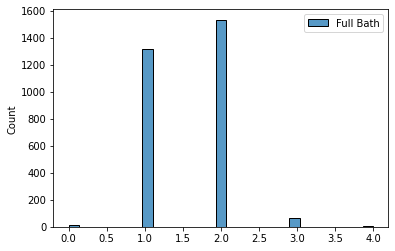


Data:  Gr Liv Area


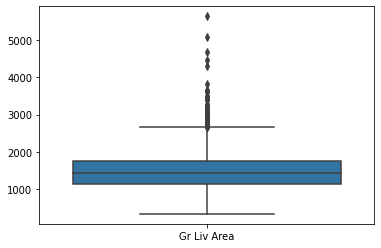

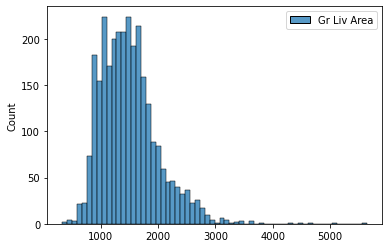


Data:  Yr Sold


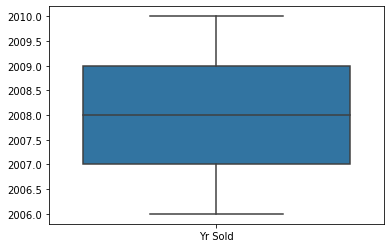

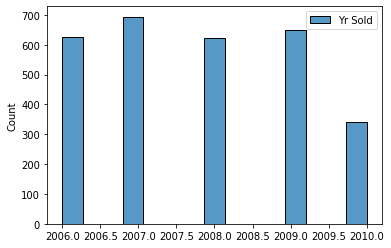


Data:  SalePrice


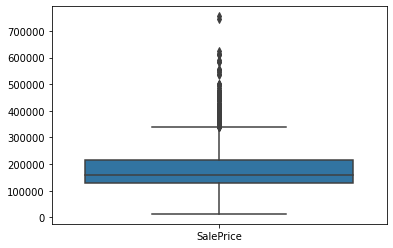

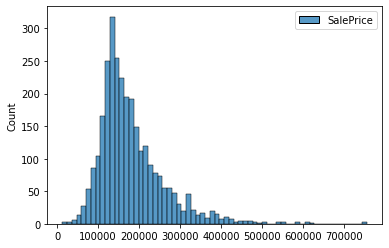

In [39]:
import matplotlib.pyplot as plt
for i in impcol: 
    print("Data: ", i)
    sns.boxplot(data = df[[i]])
    plt.show()
    sns.histplot(data = df[[i]])
    plt.show()
    print()

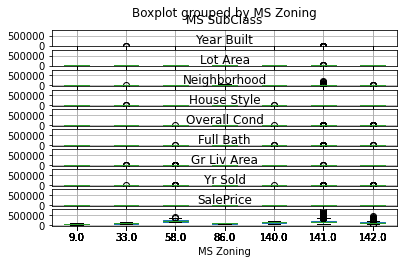

In [20]:
boxplot = df.boxplot(column=['MS SubClass','Year Built', 'Lot Area', 'Neighborhood','House Style','Overall Cond','Full Bath','Gr Liv Area','Yr Sold','SalePrice'], by= 'MS Zoning', layout=(11,1))

In [77]:
df[impcol[5]]= df[df[impcol[5]]<71][impcol[5]]

In [78]:
df[impcol[5]]

0       3.0
1       3.0
2       3.0
3       3.0
4       6.0
       ... 
2925    NaN
2926    3.0
2927    NaN
2928    3.0
2929    6.0
Name: House Style, Length: 2930, dtype: float64

In [79]:
from pandas_profiling import ProfileReport
df = df[['MS SubClass','MS Zoning','Year Built', 'Lot Area', 'Neighborhood','House Style','Overall Cond','Full Bath','Gr Liv Area','Yr Sold','SalePrice']]
profile = ProfileReport(df, title="Pandas Profiling Report")


In [80]:
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
cc = dict(enumerate(dataset['MS Zoning'].astype('category').cat.categories ) )

In [55]:
cc

{0: 9.0, 1: 33.0, 2: 58.0, 3: 86.0, 4: 140.0, 5: 141.0, 6: 142.0}

In [59]:
datasettypes= pd.read_csv("AmesHousing.csv")
datasettypes['MS Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [93]:
places = dict(zip(cc.values(),datasettypes['Neighborhood'].unique()))

In [124]:
cp = dict(df['Neighborhood'].value_counts())
pop = [cp[i] for i in places.keys()]
popdict = dict(zip(places.values(), pop))

In [ ]:
pd.DataFrame(d.items(), columns=['Date', 'DateValue'])

In [194]:
dflat= pd.DataFrame(places.items(),columns=['lon','place'])

In [195]:
import random
dflat['lat'] = df['latitude']
dflat['lon'] = df['longiitude']

In [196]:
dflat['pop'] =pop
dflat

,lon,place,lat,pop
0,92.664060,NAmes,40.402713,28
1,93.697682,Gilbert,40.237866,10
2,93.088520,StoneBr,40.992691,30
3,92.273911,NWAmes,40.142860,108
4,92.669250,Somerst,40.200064,44
5,93.014679,BrDale,40.191649,267
6,92.330793,NPkVill,41.409493,103
7,93.196522,NridgHt,40.090158,194
8,93.992917,Blmngtn,41.169382,165
9,93.237472,NoRidge,40.850221,8


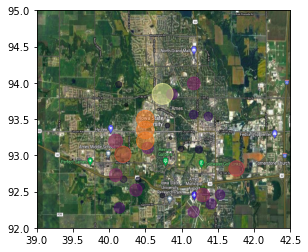

In [212]:

fig, ax = plt.subplots()
ax.imshow(img, extent=[39,42.5,92,95])
ax.scatter(dflat['lat'],dflat['lon'],s=dflat['pop'],
    c=dflat["pop"], cmap=plt.get_cmap("inferno"), alpha=0.5)
plt.show()

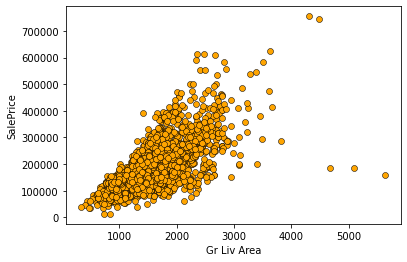

In [81]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

In [250]:
tdf= df[df['House Style']==0]
tdf

,MS SubClass,MS Zoning,Year Built,Lot Area,Neighborhood,House Style,Overall Cond,Full Bath,Gr Liv Area,Yr Sold,SalePrice
16,50,141.0,1988,12134,77.0,0.0,7,2,1752,2010,164000
65,50,141.0,1995,14720,118.0,0.0,5,2,3238,2010,410000
83,90,142.0,1978,8930,155.0,0.0,5,2,1902,2010,112000
113,50,141.0,1978,18837,115.0,0.0,5,3,1891,2010,212500
127,50,141.0,1952,9724,113.0,0.0,7,2,2461,2010,197600
...,...,...,...,...,...,...,...,...,...,...,...
2873,50,142.0,1926,7000,87.0,0.0,7,1,1285,2006,145400
2877,50,142.0,1957,9060,87.0,0.0,5,2,1638,2006,139000
2878,50,33.0,1920,11040,87.0,0.0,6,1,1336,2006,108000
2881,190,33.0,1951,9000,87.0,0.0,6,2,1396,2006,115000


<AxesSubplot:xlabel='Year Built'>

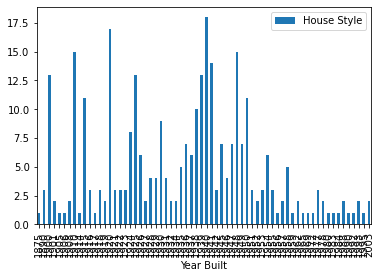

In [251]:
tdf[['House Style','Year Built']].groupby('Year Built').count().plot(kind = 'bar')

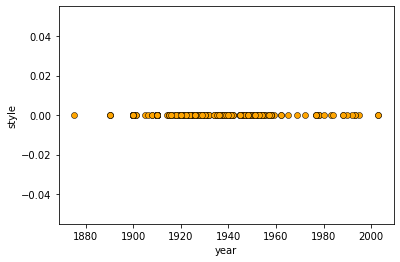

In [241]:
plt.scatter(x=tdf['Year Built'], y=tdf['House Style'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("year"); plt.ylabel("style");

In [88]:
df['Neighborhood']

0       113.0
1       113.0
2       113.0
3       113.0
4        77.0
        ...  
2925    106.0
2926    106.0
2927    106.0
2928    106.0
2929    106.0
Name: Neighborhood, Length: 2930, dtype: float64

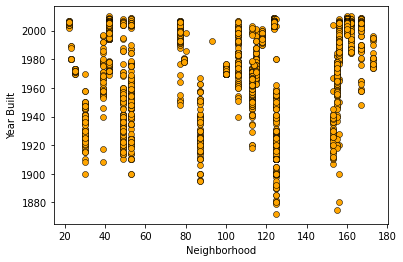

In [91]:
plt.scatter(x=df['Neighborhood'], y=df['Year Built'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Neighborhood"); plt.ylabel("Year Built");